## KNN-1

Q1. What is the KNN algorithm?

The K-Nearest Neighbors (KNN) algorithm is a simple, non-parametric, and instance-based learning algorithm used for both classification and regression tasks. Here’s a breakdown of how it works:

### 1. **Instance-Based Learning:**
   - KNN is a type of instance-based learning, meaning that it does not explicitly learn a model during the training phase. Instead, it stores the training data and uses it directly for making predictions.

### 2. **How It Works:**
   - **Classification:** When predicting the class of a new data point, KNN finds the 'k' closest training examples (neighbors) in the feature space and assigns the most common class among these neighbors to the new data point.
   - **Regression:** For regression tasks, KNN takes the average (or sometimes a weighted average) of the values of the k-nearest neighbors to predict the value of a new data point.

### 3. **Distance Metric:**
   - The closeness between data points is typically measured using a distance metric like Euclidean distance, Manhattan distance, or others depending on the problem.

### 4. **Choosing ‘k’:**
   - The parameter 'k' represents the number of neighbors to consider. A smaller 'k' makes the model sensitive to noise in the training data, while a larger 'k' can smooth out the decision boundaries, possibly leading to underfitting.

### 5. **Advantages:**
   - Simple to implement and understand.
   - No training phase, making it fast to deploy.
   - Can work well with a large number of features.

### 6. **Disadvantages:**
   - Computationally expensive during prediction, especially with large datasets.
   - Performance can degrade with high-dimensional data (curse of dimensionality).
   - Sensitive to the scale of data, so feature normalization is usually required.

### 7. **Use Cases:**
   - KNN is often used in recommendation systems, image recognition, and anomaly detection, among other applications.



Q2. How do you choose the value of K in KNN?

Choosing the optimal value of \( k \) in K-Nearest Neighbors (KNN) is crucial for the algorithm's performance. Here’s how you can approach selecting the right value of \( k \):

### 1. **Rule of Thumb:**
   - A common starting point is to choose \( k \) as the square root of the number of data points in the training set. For example, if you have 100 training samples, a starting point could be \( k = \sqrt{100} = 10 \).

### 2. **Cross-Validation:**
   - **Cross-validation** is one of the most reliable methods for selecting \( k \). You can split your dataset into training and validation sets (or use k-fold cross-validation) and evaluate the performance of different \( k \) values on the validation set. The value of \( k \) that provides the best performance (e.g., highest accuracy for classification or lowest mean squared error for regression) on the validation set is chosen.

### 3. **Impact of Small vs. Large \( k \):**
   - **Small \( k \) (e.g., \( k = 1 \)):**
     - Leads to a more flexible model that can capture more detail but is also more sensitive to noise. This can cause overfitting, where the model performs well on training data but poorly on unseen data.
   - **Large \( k \):**
     - Results in a smoother decision boundary, making the model less sensitive to noise. However, if \( k \) is too large, the model may underfit, meaning it won't capture enough detail from the data.

### 4. **Odd vs. Even \( k \) (for Classification):**
   - When performing classification tasks, it’s often better to choose an odd value of \( k \) to avoid ties in voting. For binary classification, \( k = 3, 5, 7, \) etc., are common choices.

### 5. **Considering the Data Distribution:**
   - If your data is imbalanced (i.e., some classes are more frequent than others), choosing an appropriate \( k \) becomes even more important. You might also consider using weighted KNN, where closer neighbors have more influence on the decision than those farther away.

### 6. **Experimentation:**
   - There’s no one-size-fits-all rule, so it's essential to experiment with different values of \( k \) and observe how the model’s performance changes. Tools like grid search or random search combined with cross-validation can automate this process.

### 7. **Using Elbow Method:**
   - Plot the error rate (or another performance metric) as a function of \( k \). You might see a curve where the error decreases and then stabilizes or even increases. The "elbow" point on this curve is often a good choice for \( k \), balancing model complexity and performance.

Choosing \( k \) is ultimately a process of balancing bias and variance, and cross-validation combined with experimentation is typically the most effective approach.

Selecting the right value for **k** in the **k-nearest neighbors (KNN)** algorithm is crucial. Here are some guidelines:

1. **Start with a Range**: Begin by considering a range of **k** values. You can start from **k = 1** and gradually increase it.

2. **Odd Values**: It's common to use an **odd number** for **k**. This helps avoid ties in classification.

3. **Square Root of Data Points**: A simple rule of thumb is to set **k** as the **square root of the total number of data points** (if the total number is even, make it odd by adding or subtracting 1). For instance, if you have 100 data points, consider **k = 10**.

Remember, the optimal **k** value depends on your specific dataset and problem. Experiment with different values and evaluate their impact on model performance!



Creating a simple recommendation system using the K-Nearest Neighbors (KNN) algorithm can be done by leveraging user-item interactions, such as user ratings on items (e.g., movies, products). Below is an example of a KNN-based recommendation system using Python's scikit-learn and pandas.



1. Import necessary libraries


In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors


In [2]:
# 1. Load the dataset
# Assume we have a dataset with columns: 'user_id', 'item_id', and 'rating'
# For this example, let's create a sample dataset

data = {
    'user_id': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    'item_id': [101, 102, 103, 101, 104, 105, 102, 104, 106, 103, 105, 106],
    'rating': [5, 3, 2, 4, 5, 3, 4, 2, 5, 1, 4, 3]
}
df = pd.DataFrame(data)


In [3]:
df

,user_id,item_id,rating
0,1,101,5
1,1,102,3
2,1,103,2
3,2,101,4
4,2,104,5
5,2,105,3
6,3,102,4
7,3,104,2
8,3,106,5
9,4,103,1


In [4]:
# 2. Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)


In [5]:
user_item_matrix

item_id,101,102,103,104,105,106
user_id,,,,,,
1,5.0,3.0,2.0,0.0,0.0,0.0
2,4.0,0.0,0.0,5.0,3.0,0.0
3,0.0,4.0,0.0,2.0,0.0,5.0
4,0.0,0.0,1.0,0.0,4.0,3.0


In [6]:
# 3. Train the KNN model
# We'll use cosine similarity to find similar users
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [9]:
# 4. Make a recommendation
def recommend_items(user_id, n_neighbors=2, n_recommendations=2):
    distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1), n_neighbors=n_neighbors)

    similar_users = indices.flatten().tolist()
    similar_users.remove(user_id - 1)  # Remove the user itself from the neighbors

    # Aggregate and rank items from similar users
    all_items = pd.DataFrame()
    for similar_user in similar_users:
        similar_user_items = df[df['user_id'] == similar_user + 1]
        all_items = pd.concat([all_items, similar_user_items], ignore_index=True)

    # Filter out items that the user has already rated
    items_rated_by_user = df[df['user_id'] == user_id]['item_id'].tolist()
    recommended_items = all_items[~all_items['item_id'].isin(items_rated_by_user)]

    # Rank by rating and get top recommendations
    top_recommendations = recommended_items.groupby('item_id')['rating'].mean().sort_values(ascending=False).head(n_recommendations).index.tolist()

    return top_recommendations


In [10]:
# Example: Recommend items for user 1
recommendations = recommend_items(user_id=1, n_neighbors=2, n_recommendations=2)
print(f"Recommended items for user 1: {recommendations}")

Recommended items for user 1: [104, 105]


To create a recommendation system using KNN with a real dataset, we can use the popular MovieLens dataset, which contains user ratings for movies. We'll use the MovieLens 100K dataset for this example.



In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors


In [12]:
# 1. Load the dataset
# The MovieLens 100K dataset can be downloaded and loaded directly with pandas
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=columns)


In [13]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [14]:
# 2. Create a user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)


In [15]:
user_item_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 3. Train the KNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [17]:
model_knn

NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
# 4. Make a recommendation function
def recommend_items(user_id, n_neighbors=5, n_recommendations=5):
    distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1), n_neighbors=n_neighbors)

    similar_users = indices.flatten().tolist()
    similar_users.remove(user_id - 1)  # Remove the user itself from the neighbors

    # Aggregate and rank items from similar users
    all_items = pd.DataFrame()
    for similar_user in similar_users:
        user_items = df[df['user_id'] == similar_user + 1]
        all_items = pd.concat([all_items, user_items], ignore_index=True)

    # Filter out items that the user has already rated
    items_rated_by_user = df[df['user_id'] == user_id]['item_id'].tolist()
    recommended_items = all_items[~all_items['item_id'].isin(items_rated_by_user)]

    # Rank by rating and get top recommendations
    top_recommendations = recommended_items.groupby('item_id')['rating'].mean().sort_values(ascending=False).head(n_recommendations).index.tolist()

    return top_recommendations

In [21]:
# Example: Recommend movies for user 1
recommendations = recommend_items(user_id=1, n_neighbors=5, n_recommendations=5)
print(f"Recommended items for user 1: {recommendations}")

Recommended items for user 1: [508, 496, 343, 963, 736]


In [23]:
# Example: Recommend movies for user 4
recommendations = recommend_items(user_id=4, n_neighbors=5, n_recommendations=5)
print(f"Recommended items for user 4: {recommendations}")

Recommended items for user 4: [333, 678, 331, 873, 335]


In [24]:
# 5. Map the recommended item_ids back to movie titles
url_movies = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.item'
movie_columns = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary',
                 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                 'Thriller', 'War', 'Western']
movies_df = pd.read_csv(url_movies, sep='|', names=movie_columns, encoding='latin-1')

In [25]:
movies_df

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Map item_ids to movie titles
recommended_titles = movies_df[movies_df['item_id'].isin(recommendations)]['movie_title'].tolist()
print(f"Recommended movies for user 1: {recommended_titles}")

Recommended movies for user 1: ['Edge, The (1997)', 'Game, The (1997)', 'How to Be a Player (1997)', 'Volcano (1997)', 'Picture Perfect (1997)']


Q3. What is the difference between KNN classifier and KNN regressor?

Explore the differences between the **KNN classifier** and the **KNN regressor**:

1. **KNN Classifier**:
   - **Task**: The KNN classifier is used for **classification tasks**. Given an input data point, it predicts the class label (category) it belongs to.
   - **Output**: The output of the KNN classifier is a **class label** (e.g., "spam" or "not spam," "cat" or "dog").
   - **Distance Metric**: It calculates distances (usually Euclidean distance) between the input data point and its neighbors.
   - **Decision Rule**: The class label is determined by a **majority vote** among the k nearest neighbors.
   - **Example**: If k = 3 and two neighbors are "cat" and one neighbor is "dog," the predicted class label would be "cat."

2. **KNN Regressor**:
   - **Task**: The KNN regressor is used for **regression tasks**. It predicts a **continuous value** (numeric output) based on the input data point.
   - **Output**: The output of the KNN regressor is a **numeric value** (e.g., predicting house prices, temperature, etc.).
   - **Distance Metric**: Similar to the classifier, it calculates distances between the input data point and its neighbors.
   - **Prediction Rule**: The predicted value is the **average** of the target values of the k nearest neighbors.
   - **Example**: If k = 5 and the target values of the neighbors are [10, 12, 15, 8, 11], the predicted value would be (10 + 12 + 15 + 8 + 11) / 5 = 11.2.

Remember that the choice of **k** impacts the performance of both classifier and regressor. Experiment with different values to find the optimal one for your specific problem!

The K-Nearest Neighbors (KNN) algorithm can be used for both classification and regression, but the tasks they perform and the way they interpret the output differ significantly:

### 1. **Task Performed:**
   - **KNN Classifier:** Used for **classification tasks** where the goal is to assign a label or class to a data point based on the majority label of its k nearest neighbors.
   - **KNN Regressor:** Used for **regression tasks** where the goal is to predict a continuous value by averaging the values of its k nearest neighbors.

### 2. **Output:**
   - **KNN Classifier:** The output is a **class label**. The algorithm assigns the most common class among the k nearest neighbors to the new data point.
   - **KNN Regressor:** The output is a **numerical value**. The algorithm predicts the average (or sometimes a weighted average) of the target values of the k nearest neighbors.

### 3. **Decision Boundary:**
   - **KNN Classifier:** Creates a **discrete decision boundary**. The decision boundary between classes is often piecewise linear and can be quite complex depending on the distribution of data points.
   - **KNN Regressor:** There is no decision boundary as in classification. Instead, the predictions form a smooth, continuous surface that varies with the input space.

### 4. **Loss Function:**
   - **KNN Classifier:** Uses a **zero-one loss** (i.e., the loss is 0 if the prediction is correct, and 1 if it is incorrect).
   - **KNN Regressor:** Typically uses a **mean squared error** (MSE) or similar continuous loss function to evaluate the accuracy of predictions.

### 5. **Example of Use:**
   - **KNN Classifier:** Predicting the species of a flower based on its features (e.g., petal length, petal width).
   - **KNN Regressor:** Predicting the price of a house based on its features (e.g., square footage, number of rooms).

In summary, while both KNN Classifier and KNN Regressor are based on the same underlying principle of using the nearest neighbors for prediction, they differ in the type of output they produce, the nature of their decision boundaries, and the loss functions used to evaluate their performance.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [28]:
# Load the Wine dataset for classification
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

In [29]:
X_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [30]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
# Load the Diabetes dataset for regression
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target

In [33]:
X_diabetes

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [34]:
y_diabetes

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [35]:
# Split both datasets into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

In [36]:
# KNN Classifier on the Wine dataset
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_wine, y_train_wine)
y_pred_wine = knn_classifier.predict(X_test_wine)
classification_accuracy = accuracy_score(y_test_wine, y_pred_wine)

In [37]:
# KNN Regressor on the Diabetes dataset
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_regressor.predict(X_test_diabetes)
regression_mse = mean_squared_error(y_test_diabetes, y_pred_diabetes)

In [38]:
print(f"KNN Classifier Accuracy on Wine dataset: {classification_accuracy:.2f}")

KNN Classifier Accuracy on Wine dataset: 0.74


In [39]:
print(f"KNN Regressor Mean Squared Error on Diabetes dataset: {regression_mse:.2f}")

KNN Regressor Mean Squared Error on Diabetes dataset: 3222.12


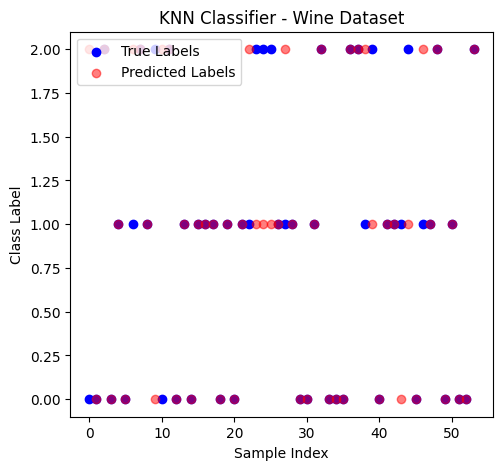

In [40]:
# Visualization
plt.figure(figsize=(12, 5))

# KNN Classifier Visualization
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_wine)), y_test_wine, color='blue', label='True Labels')
plt.scatter(range(len(y_pred_wine)), y_pred_wine, color='red', alpha=0.5, label='Predicted Labels')
plt.title('KNN Classifier - Wine Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()

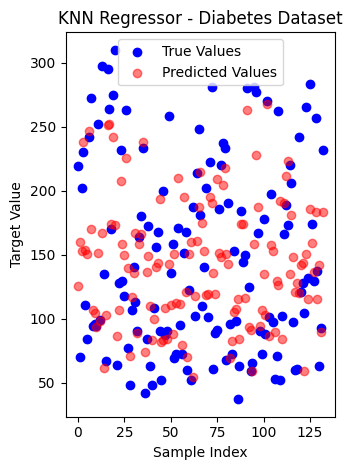

In [41]:
# KNN Regressor Visualization
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_diabetes)), y_test_diabetes, color='blue', label='True Values')
plt.scatter(range(len(y_pred_diabetes)), y_pred_diabetes, color='red', alpha=0.5, label='Predicted Values')
plt.title('KNN Regressor - Diabetes Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

Q4. How do you measure the performance of KNN?

Measuring the performance of K-Nearest Neighbors (KNN) depends on whether it is used for classification or regression. Here are the common metrics used for each:

### 1. **For KNN Classifier:**
   - **Accuracy:** The proportion of correctly classified instances out of the total instances.
     \[
     \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
     \]
   - **Confusion Matrix:** A table that shows the true positives, false positives, true negatives, and false negatives. It helps in calculating other metrics like precision, recall, and F1-score.
   - **Precision:** The ratio of true positives to the sum of true positives and false positives. It indicates how many of the predicted positive instances are actually positive.
     \[
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
     \]
   - **Recall (Sensitivity or True Positive Rate):** The ratio of true positives to the sum of true positives and false negatives. It indicates how many actual positive instances were correctly identified.
     \[
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     \]
   - **F1-Score:** The harmonic mean of precision and recall. It is useful when the classes are imbalanced.
     \[
     \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     \]
   - **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** A performance measurement for classification problems at various threshold settings. It plots the true positive rate against the false positive rate.
   - **Kappa Statistic (Cohen's Kappa):** Measures the agreement between the predicted and true classes, adjusted for chance.

### 2. **For KNN Regressor:**
   - **Mean Absolute Error (MAE):** The average of the absolute differences between the predicted and actual values.
     \[
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
     \]
   - **Mean Squared Error (MSE):** The average of the squared differences between the predicted and actual values.
     \[
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     \]
   - **Root Mean Squared Error (RMSE):** The square root of the MSE. It provides an error metric in the same units as the target variable.
     \[
     \text{RMSE} = \sqrt{\text{MSE}}
     \]
   - **R-squared (\(R^2\)):** The proportion of variance in the dependent variable that is predictable from the independent variables.
     \[
     R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
     \]
   - **Adjusted R-squared:** A modified version of \(R^2\) that adjusts for the number of predictors in the model.

### Summary:
- For **classification**, metrics like accuracy, precision, recall, F1-score, and ROC-AUC are commonly used.
- For **regression**, metrics like MAE, MSE, RMSE, and \(R^2\) are commonly used.

Choosing the appropriate metric depends on the specific problem and whether you prioritize minimizing errors, balancing precision and recall, or understanding the overall goodness of fit.

Here's a Python program to measure the performance of K-Nearest Neighbors (KNN) for both classification and regression using real datasets (Wine and Diabetes datasets):



KNN Classifier Performance on Wine Dataset:
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96
ROC-AUC: 1.00


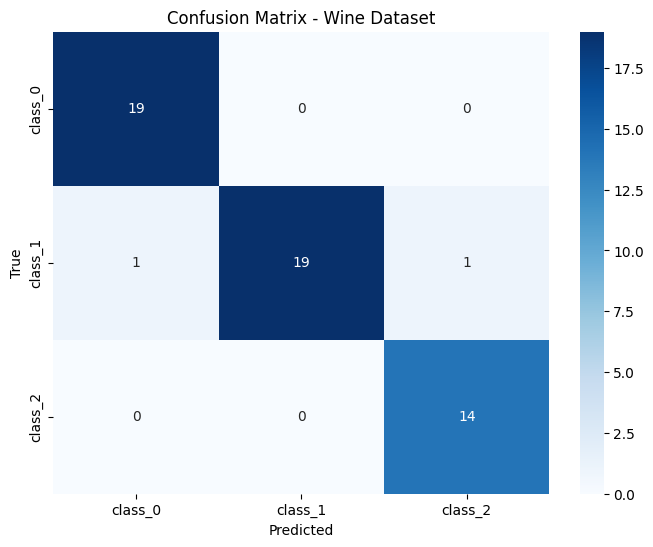


KNN Regressor Performance on Diabetes Dataset:
Mean Absolute Error (MAE): 44.00
Mean Squared Error (MSE): 3222.12
Root Mean Squared Error (RMSE): 56.76
R-squared: 0.40


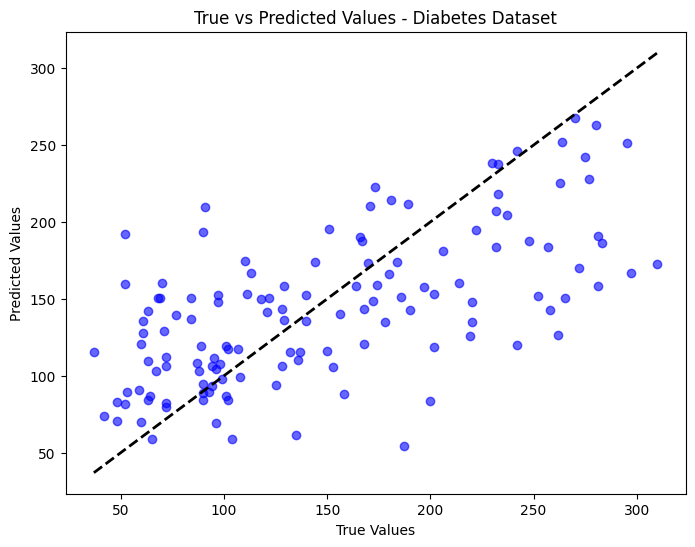

In [42]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, mean_absolute_error,
                             mean_squared_error, r2_score)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset for classification
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Load the Diabetes dataset for regression
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target

# Standardize the features
scaler = StandardScaler()
X_wine = scaler.fit_transform(X_wine)
X_diabetes = scaler.fit_transform(X_diabetes)

# Split both datasets into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

# KNN Classifier on the Wine dataset
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_wine, y_train_wine)
y_pred_wine = knn_classifier.predict(X_test_wine)
y_prob_wine = knn_classifier.predict_proba(X_test_wine)

# Classification Performance Metrics
classification_accuracy = accuracy_score(y_test_wine, y_pred_wine)
classification_precision = precision_score(y_test_wine, y_pred_wine, average='weighted')
classification_recall = recall_score(y_test_wine, y_pred_wine, average='weighted')
classification_f1 = f1_score(y_test_wine, y_pred_wine, average='weighted')
classification_roc_auc = roc_auc_score(y_test_wine, y_prob_wine, multi_class='ovr', average='weighted')

# Print Classification Metrics
print("KNN Classifier Performance on Wine Dataset:")
print(f"Accuracy: {classification_accuracy:.2f}")
print(f"Precision: {classification_precision:.2f}")
print(f"Recall: {classification_recall:.2f}")
print(f"F1-Score: {classification_f1:.2f}")
print(f"ROC-AUC: {classification_roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_wine, y_pred_wine)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix - Wine Dataset')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN Regressor on the Diabetes dataset
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_regressor.predict(X_test_diabetes)

# Regression Performance Metrics
regression_mae = mean_absolute_error(y_test_diabetes, y_pred_diabetes)
regression_mse = mean_squared_error(y_test_diabetes, y_pred_diabetes)
regression_rmse = np.sqrt(regression_mse)
regression_r2 = r2_score(y_test_diabetes, y_pred_diabetes)

# Print Regression Metrics
print("\nKNN Regressor Performance on Diabetes Dataset:")
print(f"Mean Absolute Error (MAE): {regression_mae:.2f}")
print(f"Mean Squared Error (MSE): {regression_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {regression_rmse:.2f}")
print(f"R-squared: {regression_r2:.2f}")

# Scatter plot of true vs predicted values for regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_diabetes, y_pred_diabetes, color='blue', alpha=0.6)
plt.plot([y_test_diabetes.min(), y_test_diabetes.max()], [y_test_diabetes.min(), y_test_diabetes.max()], 'k--', lw=2)
plt.title('True vs Predicted Values - Diabetes Dataset')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


Q5. What is the curse of dimensionality in KNN?

The "curse of dimensionality" refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces. For K-Nearest Neighbors (KNN), the curse of dimensionality is particularly problematic and can significantly degrade the algorithm's performance. Here’s why:

### 1. **Increased Sparsity:**
   - As the number of dimensions (features) increases, the volume of the space increases exponentially. This means that data points become more sparse and spread out in the feature space.
   - In high-dimensional spaces, almost all data points are far from each other, making it difficult for the KNN algorithm to find "nearest" neighbors that are actually close in a meaningful way.

### 2. **Distance Metrics Become Less Informative:**
   - KNN relies on distance metrics (e.g., Euclidean distance) to find the nearest neighbors. In high-dimensional spaces, the difference in distances between the nearest and farthest points tends to diminish.
   - As the number of dimensions grows, the distances to the nearest and farthest points converge, making it harder to distinguish between nearby and distant points. This diminishes the effectiveness of the distance metric in identifying relevant neighbors.

### 3. **Increased Computational Complexity:**
   - With more dimensions, the computational cost of calculating distances between points increases. The time complexity of KNN, which is already \(O(n \cdot d)\) (where \(n\) is the number of data points and \(d\) is the number of dimensions), can become prohibitive in very high-dimensional spaces.
   - Additionally, storing high-dimensional data and performing operations on it requires significantly more memory and computational resources.

### 4. **Overfitting Risk:**
   - In high-dimensional spaces, each data point may become isolated with very few or no near neighbors. This can lead to overfitting, where the model becomes too sensitive to noise and less generalizable to new data.
   - The model may fit the training data very well but perform poorly on unseen data because it is "memorizing" rather than "learning."

### 5. **Feature Selection Importance:**
   - Not all features may be relevant or contribute meaningfully to the prediction. In high dimensions, irrelevant or redundant features can dominate and obscure the influence of relevant ones, leading to poor model performance.
   - Feature selection or dimensionality reduction techniques (e.g., PCA, LDA) are often necessary to mitigate the curse of dimensionality by reducing the number of features while retaining most of the informative variance in the data.

### **Summary:**
- The curse of dimensionality in KNN results in increased sparsity, less informative distance metrics, higher computational costs, and a greater risk of overfitting.
- To address these issues, practitioners often reduce the dimensionality of the data using techniques like feature selection, PCA, or LDA before applying KNN. This helps maintain the relevance of the distance metrics and improves the model's performance and generalizability.

To demonstrate the curse of dimensionality in K-Nearest Neighbors (KNN), we'll create a synthetic dataset with an increasing number of dimensions and observe how the accuracy of the KNN classifier degrades as the dimensionality increases.



Here's the Python program:



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [44]:
def generate_data(dimensions, n_samples=1000, n_informative=2, n_classes=2):
    """Generate a synthetic dataset with specified number of dimensions."""
    X, y = make_classification(n_samples=n_samples, n_features=dimensions,
                               n_informative=n_informative, n_redundant=0,
                               n_clusters_per_class=1, n_classes=n_classes,
                               random_state=42)
    return X, y

In [45]:
def evaluate_knn_performance(dimensions_list, n_neighbors=5):
    """Evaluate KNN performance as the number of dimensions increases."""
    accuracies = []

    for d in dimensions_list:
        # Generate data
        X, y = generate_data(dimensions=d)

        # Standardize the data
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train and evaluate KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Dimensions: {d}, Accuracy: {accuracy:.4f}")

    return accuracies

In [46]:
# List of increasing dimensions to evaluate
dimensions_list = [2, 5, 10, 20, 50, 100, 200, 500, 1000]

In [47]:
# Evaluate KNN performance across different dimensions
accuracies = evaluate_knn_performance(dimensions_list)

Dimensions: 2, Accuracy: 0.9333
Dimensions: 5, Accuracy: 0.9033
Dimensions: 10, Accuracy: 0.8767
Dimensions: 20, Accuracy: 0.7867
Dimensions: 50, Accuracy: 0.7300
Dimensions: 100, Accuracy: 0.6300
Dimensions: 200, Accuracy: 0.5867
Dimensions: 500, Accuracy: 0.5667
Dimensions: 1000, Accuracy: 0.5100


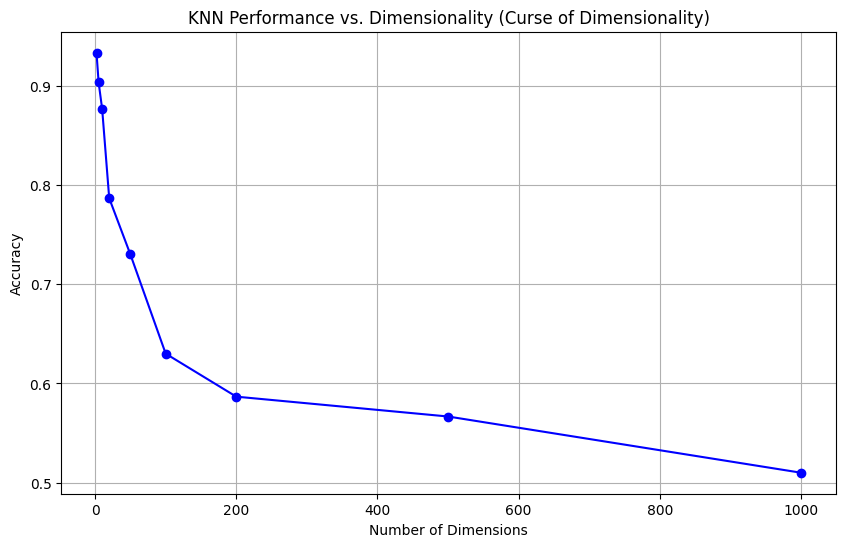

In [48]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions_list, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Performance vs. Dimensionality (Curse of Dimensionality)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Q6. How do you handle missing values in KNN?

Handling missing values is an important step in preparing data for K-Nearest Neighbors (KNN), as KNN relies on distance calculations that can be skewed or invalidated by missing data. Here are some common strategies to handle missing values in KNN:

### 1. **Removing Rows with Missing Values:**
   - **Description:** This is the simplest approach where any row containing a missing value is removed from the dataset.
   - **Pros:** Easy to implement; preserves the integrity of the remaining data.
   - **Cons:** Can lead to significant loss of data, especially if many rows contain missing values.

   ```python
   # Remove rows with missing values
   data_cleaned = data.dropna()
   ```

### 2. **Imputation with Mean/Median/Mode:**
   - **Description:** Missing values can be imputed (filled in) using the mean, median, or mode of the non-missing values in that feature.
   - **Pros:** Simple and effective, especially when the percentage of missing values is low.
   - **Cons:** Can introduce bias, especially if the missing data is not missing at random.

   ```python
   from sklearn.impute import SimpleImputer

   # Impute missing values with the mean (can also use 'median' or 'most_frequent')
   imputer = SimpleImputer(strategy='mean')
   data_imputed = imputer.fit_transform(data)
   ```

### 3. **Imputation with KNN:**
   - **Description:** KNN itself can be used to impute missing values. The idea is to find the K nearest neighbors of the data point with missing values and use their corresponding feature values to impute the missing data.
   - **Pros:** Considers the local structure of the data, which can lead to more accurate imputation.
   - **Cons:** Computationally intensive, especially with large datasets or high-dimensional data.

   ```python
   from sklearn.impute import KNNImputer

   # Impute missing values using KNN
   knn_imputer = KNNImputer(n_neighbors=5)
   data_imputed_knn = knn_imputer.fit_transform(data)
   ```

### 4. **Using Algorithms that Handle Missing Values:**
   - **Description:** Some algorithms are robust to missing data and can handle it directly. However, KNN is not one of these algorithms, so preprocessing is required.
   - **Pros:** Eliminates the need for explicit imputation.
   - **Cons:** Not applicable to KNN; instead, preprocessing must handle the missing data.

### 5. **Assigning Missing Values a Unique Category (for Categorical Data):**
   - **Description:** For categorical features, missing values can be treated as a separate category.
   - **Pros:** Keeps the data intact without imputation.
   - **Cons:** May not always be appropriate, as the missingness might have a different meaning.

   ```python
   data['feature'] = data['feature'].fillna('Missing')
   ```

### 6. **Multiple Imputation:**
   - **Description:** Multiple imputation involves creating multiple complete datasets by imputing the missing values several times. The results are then combined to account for the uncertainty in the imputation process.
   - **Pros:** More sophisticated and can provide better estimates.
   - **Cons:** More complex and computationally expensive.

   ```python
   from sklearn.experimental import enable_iterative_imputer
   from sklearn.impute import IterativeImputer

   # Use Iterative Imputer (similar to multiple imputation)
   iterative_imputer = IterativeImputer()
   data_imputed_multiple = iterative_imputer.fit_transform(data)
   ```

### Summary:
- **Simple Imputation** (mean, median, mode) is quick and often effective.
- **KNN Imputation** is more accurate as it considers the relationships between features but is computationally expensive.
- The choice of method depends on the dataset size, the proportion of missing data, and the potential impact of the imputation on model performance.

For KNN specifically, **KNN Imputation** is often the preferred approach as it aligns well with the assumptions of the KNN algorithm, though it comes with a higher computational cost.

Handling missing values in K-Nearest Neighbors (KNN) is crucial because KNN is sensitive to the presence of missing values in the dataset. There are a few common strategies to handle missing values in the context of KNN:

1. Imputation before applying KNN: Replace missing values with some form of imputation, such as the mean, median, or mode of the column, or use more advanced imputation techniques.

2. Use KNN-based imputation: Apply KNN itself to predict the missing values based on the values of the nearest neighbors.



Here's a basic example in Python demonstrating both strategies using scikit-learn and pandas. For this example, we'll use KNN-based imputation, as it's specifically tailored to the KNN approach:



In [49]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris

In [50]:
# Load a sample dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [51]:
# Introduce some missing values for demonstration
import numpy as np
np.random.seed(0)
missing_indices = np.random.choice(X.size, size=10, replace=False)
X.values.ravel()[missing_indices] = np.nan

print("Original data with missing values:")
print(X.head())

Original data with missing values:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [52]:

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

In [53]:
# Impute missing values
X_imputed = knn_imputer.fit_transform(X)


In [54]:
# Convert back to DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


In [55]:
print("\nData after KNN imputation:")
print(X_imputed_df.head())



Data after KNN imputation:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Sure! Let's use the Titanic dataset to demonstrate handling missing values with KNN imputation. We'll use the titanic dataset from the seaborn library, and perform KNN-based imputation on it.



In [56]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer


In [57]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


In [60]:
# Display the first few rows and missing value information
print("Original Titanic dataset with missing values:")
titanic.head()




Original Titanic dataset with missing values:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
# Display missing value information
print("\nMissing values in each column:")
titanic.isnull().sum()


Missing values in each column:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [62]:
# Select features to impute and drop non-numeric columns
# For demonstration, we'll use only numerical columns and a few selected categorical columns
features = titanic[['age', 'fare', 'embarked']]
features = pd.get_dummies(features, drop_first=True)  # Convert categorical to numeric

In [63]:

# Introduce some missing values for demonstration
import numpy as np
np.random.seed(0)
missing_indices = np.random.choice(features.size, size=10, replace=False)
features.values.ravel()[missing_indices] = np.nan

In [64]:

print("\nFeatures with missing values:")
print(features.head())


Features with missing values:
    age     fare  embarked_Q  embarked_S
0  22.0   7.2500       False        True
1  38.0  71.2833       False       False
2  26.0   7.9250       False        True
3  35.0  53.1000       False        True
4  35.0   8.0500       False        True


In [65]:
# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)


In [66]:
# Impute missing values
features_imputed = knn_imputer.fit_transform(features)


In [67]:
# Convert back to DataFrame
features_imputed_df = pd.DataFrame(features_imputed, columns=features.columns)
print("\nFeatures after KNN imputation:")
features_imputed_df.head()



Features after KNN imputation:


,age,fare,embarked_Q,embarked_S
0,22.0,7.2500,0.0,1.0
1,38.0,71.2833,0.0,0.0
2,26.0,7.9250,0.0,1.0
3,35.0,53.1000,0.0,1.0
4,35.0,8.0500,0.0,1.0


Q7. Compare and contrast the performance of the KNN classifier and regressor. Which one is better for
which type of problem?

Certainly! Let's delve into the differences between KNN (K-Nearest Neighbors) regression and classification models:

1. **KNN Regression**:
   - **Objective**: KNN regression aims to predict the **continuous** value of the output variable (also known as the dependent variable).
   - **Prediction Approach**: It computes a local average of the target values for the K nearest neighbors.
   - **Output Space**: The codomain of the model is a continuous space (e.g., real numbers, $$\mathbb{R}$$).
   - **Use Case**: KNN regression is suitable for problems where the output variable is numeric or continuous, such as predicting house prices, temperature, or stock prices.
   - **Scattered Distribution**: In a regressor, the dependent variable values are scattered throughout the coordinate plane³.

2. **KNN Classification**:
   - **Objective**: KNN classification aims to predict the **class label** of the output variable.
   - **Prediction Approach**: It performs majority voting among the K nearest neighbors to determine the predicted class.
   - **Output Space**: The codomain of the model is a discrete space (e.g., {0, 1} for binary classification).
   - **Use Case**: KNN classification is useful for problems where the output variable represents categories or classes, such as spam detection, image recognition, or sentiment analysis.
   - **Local Probability**: It computes the local probability of belonging to a specific class¹⁴.

In summary:
- Use KNN regression for continuous output variables.
- Use KNN classification for discrete class labels.
- KNN is often chosen for its simplicity and effectiveness in capturing non-linear relationships, while Logistic Regression is preferred for efficiency and interpretability, especially when the relationship between predictors and the response is linear or logistic in nature².

Remember that the choice between KNN regression and classification depends on the problem context and the nature of the output variable.

K-Nearest Neighbors (KNN) can be used for both classification and regression tasks. Here's a comparison of KNN Classifier and KNN Regressor, including their performance characteristics and suitability for different types of problems:

### KNN Classifier

**Purpose:**
- **Classification**: Assigns a label to an input based on the majority label of its nearest neighbors.

**How It Works:**
- For a given data point, it finds the `k` nearest neighbors based on a distance metric (e.g., Euclidean distance).
- The most common class among these neighbors is assigned as the predicted class for the data point.

**Performance Characteristics:**
- **Decision Boundaries:** KNN Classifier tends to create complex, non-linear decision boundaries. The boundaries become more flexible with increasing `k`.
- **Sensitivity to Noise:** KNN Classifier can be sensitive to noisy data and outliers, especially when `k` is small.
- **Dimensionality:** Performance can degrade with high-dimensional data due to the "curse of dimensionality."

**Best For:**
- Problems where the data is categorical or where the classes are well-separated.
- When you want to leverage the local structure of the data, especially when classes are not linearly separable.

### KNN Regressor

**Purpose:**
- **Regression**: Predicts a continuous value based on the average (or weighted average) of the values of its nearest neighbors.

**How It Works:**
- For a given data point, it finds the `k` nearest neighbors and computes the average of their target values to predict the target value for the data point.

**Performance Characteristics:**
- **Prediction Boundaries:** KNN Regressor produces smooth and non-linear prediction boundaries. The predictions are smoother with increasing `k`.
- **Sensitivity to Noise:** KNN Regressor can also be sensitive to noise and outliers, especially when `k` is small.
- **Dimensionality:** Like the classifier, the regressor can struggle with high-dimensional data due to the curse of dimensionality.

**Best For:**
- Problems where the target variable is continuous and you want to model non-linear relationships.
- Situations where you expect that similar instances have similar target values.

### Comparison

1. **Task Suitability:**
   - **KNN Classifier** is better for classification problems where the goal is to assign categorical labels.
   - **KNN Regressor** is suitable for regression problems where the goal is to predict continuous values.

2. **Distance Metric Impact:**
   - Both methods rely heavily on the distance metric used. Different metrics can lead to different results, so choosing an appropriate metric is crucial.

3. **Performance with Data Size:**
   - Both models can be computationally expensive for large datasets because they require calculating distances between the query point and all training points.

4. **Handling of Outliers:**
   - Both KNN Classifier and Regressor can be influenced by outliers and noisy data, although the KNN Regressor might average out the influence of outliers better than the KNN Classifier.

5. **Parameter Tuning:**
   - **`k` Value**: In both models, the choice of `k` (number of neighbors) is crucial. A small `k` may lead to overfitting, while a large `k` might lead to underfitting.

6. **Dimensionality Issues:**
   - Both methods suffer from the curse of dimensionality. Feature selection or dimensionality reduction techniques can help mitigate these issues.

### Summary

- **KNN Classifier** is better suited for problems where you need to classify data into categories, especially when the categories are not linearly separable.
- **KNN Regressor** is better suited for predicting continuous outcomes where local averages are a good predictor of the target variable.

The choice between KNN Classifier and KNN Regressor depends on the nature of your problem—whether it is a classification or regression task—and the characteristics of your data.


To compare the performance of K-Nearest Neighbors (KNN) Classifier and KNN Regressor, you can use a common dataset for both classification and regression tasks. For this example, we'll use the Iris dataset for classification and a regression version of it by creating a target variable

In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_class = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)

print(f"KNN Classifier Accuracy: {accuracy:.4f}")

# Create a regression target by adding some noise
np.random.seed(0)
y_regression = y + np.random.normal(0, 0.1, size=y.shape)

# Split the data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=0)

# Standardize features
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"KNN Regressor Mean Squared Error: {mse:.4f}")


KNN Classifier Accuracy: 0.9778
KNN Regressor Mean Squared Error: 0.0553


## Results Interpretation:

* Accuracy (Classifier): Measures how well the KNN classifier predicts the correct class labels. Higher accuracy indicates better performance for classification tasks.

* Mean Squared Error (Regressor): Measures the average squared difference between predicted and true values. Lower MSE indicates better performance for regression tasks.



## Which One is Better For Which Type of Problem:
 * KNN Classifier: Best suited for classification problems where the goal is to categorize data into discrete classes (e.g., spam detection, image classification).

* KNN Regressor: Best suited for regression problems where the goal is to predict a continuous value (e.g., predicting house prices, temperature forecasting).


Q8. What are the strengths and weaknesses of the KNN algorithm for classification and regression tasks,
and how can these be addressed?



### Strengths of KNN:

1. **Non-Linearity**: KNN can capture complex, non-linear relationships between features and the target variable. It doesn't assume any specific functional form.

2. **Simple and Intuitive**: KNN is easy to understand and implement. It doesn't require model training; instead, it memorizes the training data.

3. **Adaptability**: KNN adapts well to changes in the data distribution, making it suitable for dynamic environments.

### Weaknesses of KNN:

1. **Computationally Expensive**: KNN searches for nearest neighbors in the entire dataset, which can be slow for large datasets. Approximate methods (e.g., KD-trees) can mitigate this.

2. **Sensitive to Noise and Outliers**: KNN is sensitive to noisy data points and outliers. Robust preprocessing (e.g., outlier removal) is essential.

3. **Curse of Dimensionality**: In high-dimensional spaces, the "nearest" neighbors may not be truly representative. Dimensionality reduction or feature selection can help.

### Addressing Weaknesses:

1. **Distance Metrics**: Choose an appropriate distance metric (e.g., Euclidean, Manhattan, or cosine) based on the problem. Experiment with different metrics to find the best fit.

2. **Hyperparameter Tuning**: Optimize the value of K (number of neighbors) using cross-validation. Smaller K may lead to overfitting, while larger K may lead to underfitting.

3. **Feature Scaling**: Normalize or standardize features to ensure equal importance across dimensions.

4. **Weighted Voting**: Assign weights to neighbors based on their distance. Closer neighbors contribute more to the prediction.

5. **Ensemble Methods**: Combine KNN with other models (e.g., bagging or boosting) to improve robustness and accuracy.

Remember that KNN's performance depends on the specific problem and dataset. Experimentation and fine-tuning are crucial!

Q9. What is the difference between Euclidean distance and Manhattan distance in KNN?

Euclidean distance and Manhattan distance are two common distance metrics used in K-Nearest Neighbors (KNN) and other machine learning algorithms. They measure the distance between two points in different ways. Here’s a breakdown of their differences:

### Euclidean Distance

**Definition:**
- Euclidean distance is the straight-line distance between two points in a multidimensional space.

**Formula:**
For two points \( p = (p_1, p_2, \ldots, p_n) \) and \( q = (q_1, q_2, \ldots, q_n) \) in an \( n \)-dimensional space, the Euclidean distance \( d \) is calculated as:
\[ d(p, q) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2} \]

**Characteristics:**
- **Straight-Line Distance:** Measures the shortest path between two points.
- **Pythagorean Theorem:** Based on the Pythagorean theorem, which generalizes to multiple dimensions.
- **Sensitive to Scale:** Can be sensitive to the scale of the features because the squared differences magnify the effect of differences in features.

**Example Calculation:**
For points \( p = (1, 2) \) and \( q = (4, 6) \):
\[ d(p, q) = \sqrt{(4-1)^2 + (6-2)^2} = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5 \]

### Manhattan Distance

**Definition:**
- Manhattan distance, also known as L1 distance or taxicab distance, is the distance between two points measured along axes at right angles.

**Formula:**
For two points \( p = (p_1, p_2, \ldots, p_n) \) and \( q = (q_1, q_2, \ldots, q_n) \) in an \( n \)-dimensional space, the Manhattan distance \( d \) is calculated as:
\[ d(p, q) = \sum_{i=1}^n |p_i - q_i| \]

**Characteristics:**
- **Axis-Aligned Distance:** Measures distance as if moving along grid lines or streets in a city.
- **Sum of Absolute Differences:** Directly sums up the absolute differences in each dimension.
- **Less Sensitive to Outliers:** Less sensitive to outliers compared to Euclidean distance because it does not square the differences.

**Example Calculation:**
For points \( p = (1, 2) \) and \( q = (4, 6) \):
\[ d(p, q) = |4-1| + |6-2| = 3 + 4 = 7 \]

### Comparison and Use Cases

1. **Geometry of Distance:**
   - **Euclidean Distance:** Measures the straight-line distance between points. More suitable when you want to capture the actual spatial distance.
   - **Manhattan Distance:** Measures the path distance along axes. Useful in grid-like or discrete spaces.

2. **Impact of Feature Scaling:**
   - **Euclidean Distance:** Sensitive to feature scaling. Features should be normalized or standardized to ensure fair distance measurement.
   - **Manhattan Distance:** Less sensitive to the scale of features but still benefits from normalization.

3. **Sensitivity to Outliers:**
   - **Euclidean Distance:** More sensitive to outliers because differences are squared.
   - **Manhattan Distance:** Less sensitive to outliers because it uses absolute differences.

4. **Computational Complexity:**
   - **Euclidean Distance:** Requires computing square roots and squares, which can be computationally more intensive.
   - **Manhattan Distance:** Involves only absolute differences and addition, which can be simpler to compute.

### Choosing the Distance Metric

- **Euclidean Distance:** Generally preferred for continuous data and when the relationship between features is expected to be linear.
- **Manhattan Distance:** Useful for categorical or discrete data and when the data is structured in a grid-like manner.

Choosing the right distance metric depends on the nature of your data and the problem you are trying to solve. In practice, you may need to experiment with both metrics to determine which one works best for your specific application.

To demonstrate the difference between Euclidean and Manhattan distances in K-Nearest Neighbors (KNN), we can use a simple example with a 2D dataset. We will:



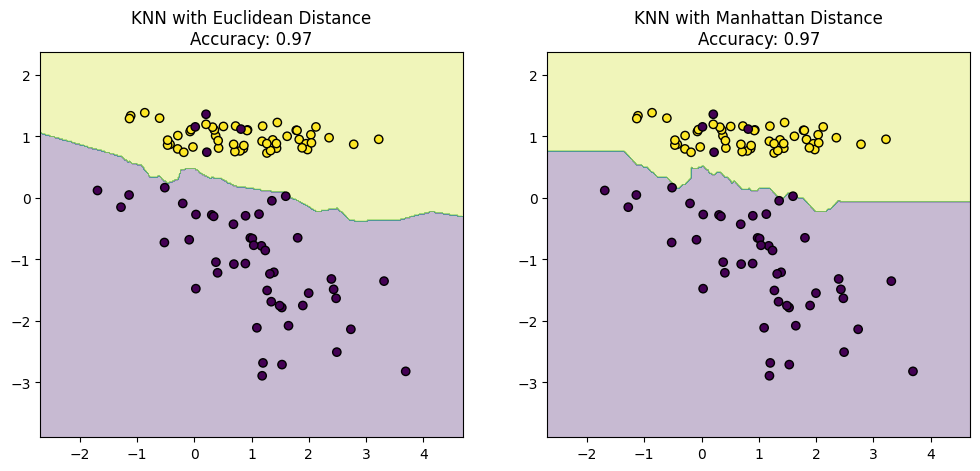

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Generate a sample dataset with valid parameters
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)

# KNN Classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# KNN Classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(knn_euclidean, X, y, f'KNN with Euclidean Distance\nAccuracy: {accuracy_euclidean:.2f}')

plt.subplot(1, 2, 2)
plot_decision_boundary(knn_manhattan, X, y, f'KNN with Manhattan Distance\nAccuracy: {accuracy_manhattan:.2f}')

plt.show()


Q10. What is the role of feature scaling in KNN?

Feature scaling plays a crucial role in K-Nearest Neighbors (KNN) due to the way the algorithm calculates distances between data points. Here’s an overview of its importance and impact:

### Role of Feature Scaling in KNN

1. **Distance Calculation:**
   - KNN relies on distance metrics (e.g., Euclidean, Manhattan) to determine the nearest neighbors. If features are on different scales, those with larger scales will dominate the distance calculation, leading to biased results.
   - For example, if one feature is measured in kilometers and another in meters, the feature in kilometers will have a larger range and thus a greater impact on distance calculations.

2. **Equal Contribution of Features:**
   - Scaling ensures that all features contribute equally to the distance computation. Without scaling, features with larger ranges or units will disproportionately affect the distance and the KNN model’s predictions.

3. **Improved Model Performance:**
   - Proper scaling can improve the accuracy and efficiency of the KNN algorithm. It helps the model to make more balanced decisions based on the relative distances between data points.

4. **Convergence and Stability:**
   - Scaling can help the algorithm converge faster and more reliably, as it prevents numerical instability caused by large differences in feature magnitudes.

### Common Feature Scaling Techniques

1. **Standardization (Z-score Normalization):**
   - **Formula:** \( x_{scaled} = \frac{x - \mu}{\sigma} \)
   - **Description:** Centers the data around 0 with a standard deviation of 1. It transforms features to have a mean of 0 and a variance of 1.
   - **When to Use:** Useful when the features have different units and scales, and you want to standardize them to a common scale.

2. **Min-Max Normalization (Rescaling):**
   - **Formula:** \( x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} \)
   - **Description:** Rescales features to a fixed range, typically [0, 1]. It transforms the feature values to be within a specified range.
   - **When to Use:** Suitable when features need to be transformed to a specific range. It is sensitive to outliers.

3. **Robust Scaler:**
   - **Formula:** \( x_{scaled} = \frac{x - \text{median}}{\text{IQR}} \)
   - **Description:** Scales features based on the median and the interquartile range (IQR). Less sensitive to outliers compared to standardization.
   - **When to Use:** Useful when the data contains outliers that could affect the scaling.





### Summary

- **Impact of Scaling:** Feature scaling is essential for KNN because it ensures that all features contribute equally to the distance calculations, leading to more accurate and stable model performance.
- **Techniques:** Standardization, Min-Max Normalization, and Robust Scaler are commonly used methods for feature scaling.
- **Implementation:** Always apply scaling to both the training and testing datasets to maintain consistency and fairness in model evaluation.

In [72]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN Classifier Accuracy with Feature Scaling: {accuracy:.2f}")


KNN Classifier Accuracy with Feature Scaling: 0.98
